### Step 1:Import Libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load Dataset

In [25]:
# Example: Boston housing dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
# Save to a CSV file
df.to_csv(r"C:\Users\hp\Codveda Projects\Task 4  Predictive Modeling (Regression)\Data\california_housing.csv", index=False)

df = data.frame
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


### Step 3: Define Features and Target

In [15]:
X = df.drop("MedHouseVal", axis=1)   # Features
y = df["MedHouseVal"]               # Target variable


### Step 4: Train-Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Step 5: Train and Evaluate Linear Regression

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"R-squared: {r2_lr:.4f}")


Linear Regression Results:
Mean Squared Error: 0.5559
R-squared: 0.5758


### Step 6: Train and Evaluate Decision Tree

In [20]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_pred_tree = tree_reg.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree Results:")
print(f"Mean Squared Error: {mse_tree:.4f}")
print(f"R-squared: {r2_tree:.4f}")



Decision Tree Results:
Mean Squared Error: 0.4952
R-squared: 0.6221


### Step 7: Train and Evaluate Random Forest

In [21]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")



Random Forest Results:
Mean Squared Error: 0.2554
R-squared: 0.8051


### Step 8: Compare Model Performance


Model Comparison:
               Model       MSE  R-squared
0  Linear Regression  0.555892   0.575788
1      Decision Tree  0.495235   0.622076
2      Random Forest  0.255368   0.805123


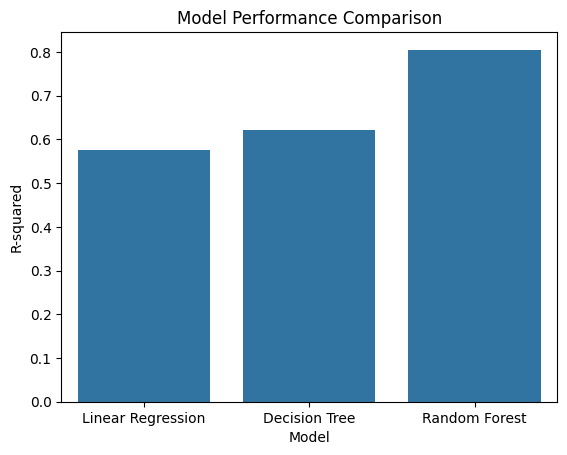

In [23]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [mse_lr, mse_tree, mse_rf],
    "R-squared": [r2_lr, r2_tree, r2_rf]
})

print("\nModel Comparison:")
print(results)

sns.barplot(x="Model", y="R-squared", data=results)
plt.title("Model Performance Comparison")
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 4  Predictive Modeling (Regression)\Visuals\Model Performance Comparison.png") 
plt.show()